<a href="https://colab.research.google.com/github/IlariaSalogni/Psycholinguistic/blob/main/Psycholinguistics_morphological_complexity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A quantitative analysis of the morphological complexity using French verbal system data
#### Ilaria Salogni - nov. 2023

Notebook where the assignment for the Computational Psyicholinguistics course at Università di Pisa (prof. Claudia Marzi, Vito Pirrelli, Marcello Ferro), that contains the R code used for the quantitative analysis of the morphological complexity of the verbal french system, as reported in the assignment paper here. The dataset for this notebook can be found here.

In [ ]:
# REQUIREMENTS
install.packages("dplyr")
install.packages("ggplot2")
install.packages("gam")
install.packages("itsadug")

In [ ]:
library("dplyr")
library("ggplot2")
library("gam")
library("itsadug")

### 1. Dataset

In [1]:
setwd("/content")
df <- read.csv("FR.txt", header=T, sep = "\t")
head(df)

,word.id,paradigm,word,tsom.word,symbol.id,symbol,letter.pos,act.recoding,surprise,conn.strength,⋯,IR,frequency,word.NNB.stem0,dist.to.MB,paradigm.Regularity,nCompetitors,nCompetitorsIn,ng2,training.id,repetition.id
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<int>
1,1,etre,etre,"#,e,T,R,E,$",1,#,1,0.000,0,1.000,⋯,I,5,1,-3,0.48,52,NaN,0,IT_FR_5,1
2,1,etre,etre,"#,e,T,R,E,$",9,e,2,1.000,0,1.000,⋯,I,5,1,-2,0.48,2,1,10,IT_FR_5,1
3,1,etre,etre,"#,e,T,R,E,$",25,T,3,1.000,0,1.000,⋯,I,5,1,-1,0.48,1,1,10,IT_FR_5,1
4,1,etre,etre,"#,e,T,R,E,$",23,R,4,1.000,0,0.250,⋯,I,5,1,0,0.48,0,1,95,IT_FR_5,1
5,1,etre,etre,"#,e,T,R,E,$",10,E,5,0.988,0,0.308,⋯,I,5,1,1,0.48,0,1,1040,IT_FR_5,1
6,1,etre,etre,"#,e,T,R,E,$",3,$,6,0.991,0,NaN,⋯,I,5,1,2,0.48,NaN,2,310,IT_FR_5,1


In [6]:
result <- df %>%
     group_by(paradigm) %>%
     summarize(unique_word_count = n_distinct(word))

print(result, n=50)

# A tibble: 50 × 2
   paradigm       unique_word_count
   <chr>                      <int>
 1 "agir"                        11
 2 "aimer"                       14
 3 "ajouter"                     14
 4 "aller"                       15
 5 "assurer"                     14
 6 "avoir"                       14
 7 "comprendre"                  12
 8 "connaitre"                   13
 9 "constituer"                  14
10 "cr\xe9er"                    14
11 "demander"                    14
12 "devenir"                     13
13 "devoir"                      13
14 "dire"                         9
15 "donner"                      14
16 "d\xe9couvrir"                13
17 "etre"                        14
18 "faire"                       12
19 "laisser"                     14
20 "lire"                        13
21 "mettre"                      12
22 "offrir"                      13
23 "organiser"                   14
24 "ouvrir"                      13
25 "parler"                      14
26 "passe

In [8]:
# CREATION OF A DATASET WITHOUT # (BECAUSE OF NULL VALUE OF ENTROPY)
no_df <- subset(df, symbol != "#")

## 2. Results and discussion

###  Regulars vs Irregulars

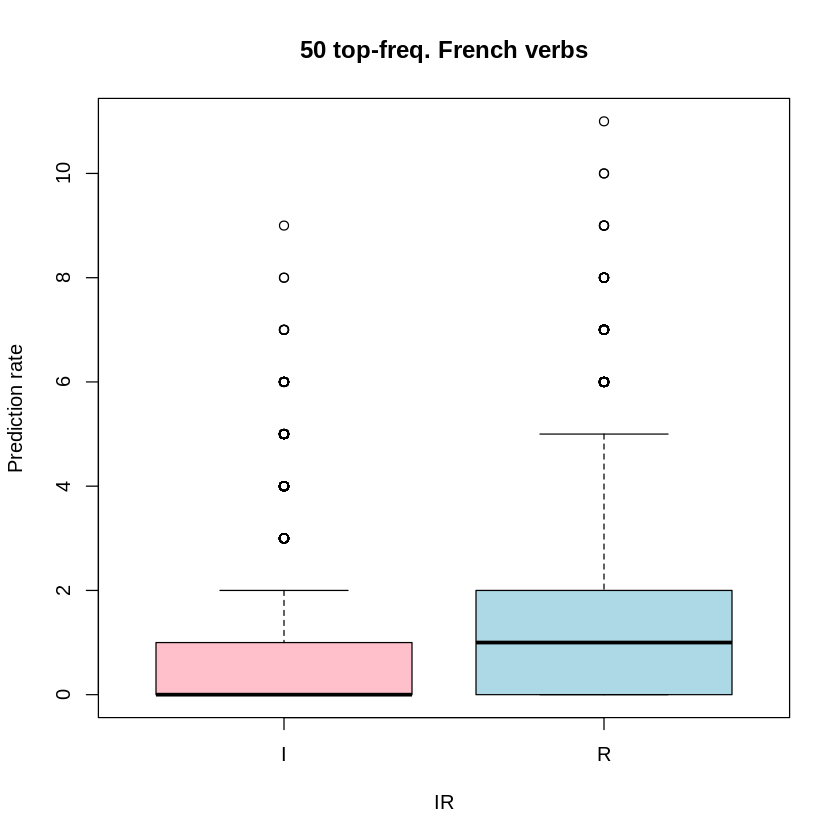

In [9]:
# REGULARS VS. IRREGULARS
boxplot(anticip.BMU ~ IR, col=c("pink", "lightblue"), data=no_df, main="50 top-freq. French verbs", ylab="Prediction rate")

Description: boxplot where the variable anticip.BMU is plotted against the categorical regularity measure (IR), to compare the prediction rate across regular and irregular forms.

In [15]:
cor.test(no_df$anticip.BMU, no_df$dist.to.MB)


	Pearson's product-moment correlation

data:  no_df$anticip.BMU and no_df$dist.to.MB
t = 48.956, df = 26563, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2766108 0.2986713
sample estimates:
      cor 
0.2876792 


Pearson correlation test between the prediction rate and the distance from the morpheme bound, to quantify the degree of association between the variables.p-value smaller than 2.2e-16 is an extremely small value, that indicates strong statistical evidence between prediction rate and distance to morpheme bound, against the null hypothesis.

`geom_smooth()` using formula = 'y ~ x'


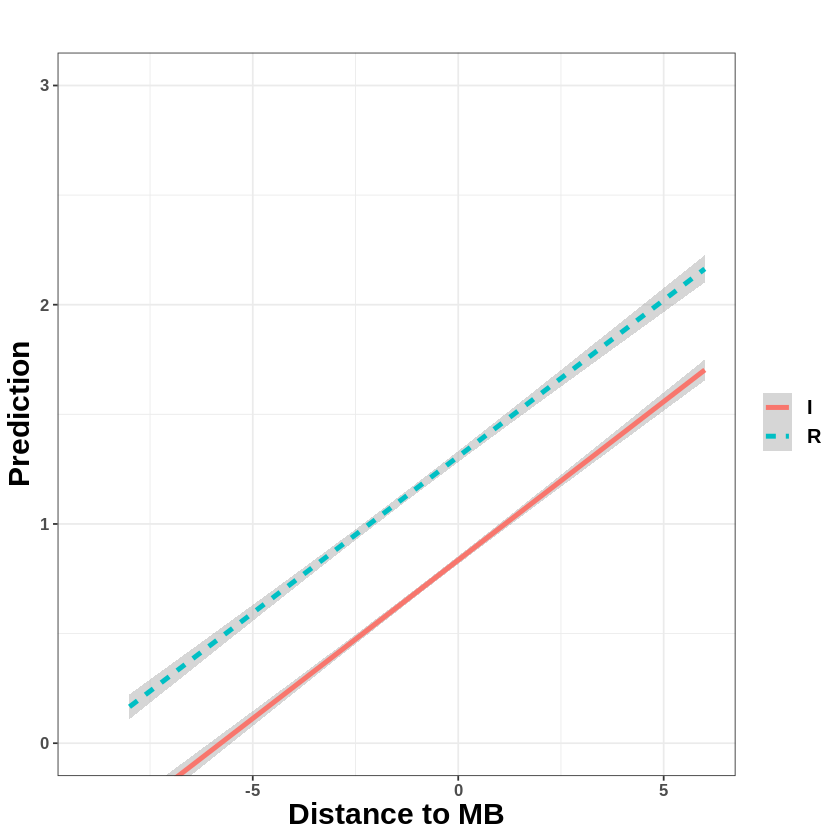

In [18]:
# LINEAR REGRESSION; MORPHEME BOUNDARY - PREDICTION

ggplot(no_df, aes(x = dist.to.MB, y = anticip.BMU, group = IR)) +
  geom_smooth(method = "lm", se = TRUE, aes(linetype = IR, color = IR), size = 1.4) +
  coord_cartesian(ylim = c(0, 3)) +
  ylab("Prediction") + xlab("Distance to MB") +
  theme_bw() +
  ggtitle("") +
  theme(
    text = element_text(size = 18, face = "bold", hjust = 0.5, vjust = 0.5),
    legend.title = element_blank(),
    legend.text = element_text(size = 12),
    axis.text = element_text(size = 10)
  )


Description: linear regression model illustrating the prediction rate on a letter-by-letter basis, with the distance from the Morpheme Boundary (MB) as the independent variable (where MB=0 represents the initial element of the suffix).

### Non-linear regressions using LOESS

`geom_smooth()` using formula = 'y ~ x'


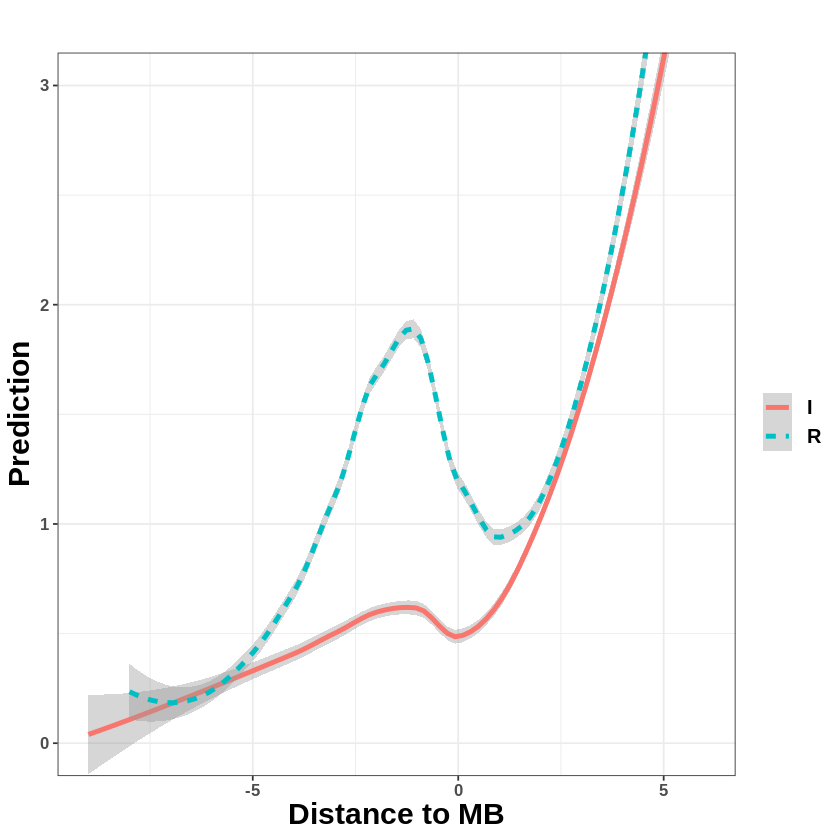

In [19]:
# NON LINEAR REGRESSION; MORPHEME BOUNDARY - PREDICTION
ggplot(no_df, aes(x=dist.to.MB, y=anticip.BMU, group=IR))+
  geom_smooth(method= "loess", se = TRUE, aes(linetype=IR, color=IR), size=1.4)+
  coord_cartesian(ylim=c(0, 3))+
  ylab("Prediction")+ xlab("Distance to MB")+
  theme_bw()+
  ggtitle("") +
  theme(text =
    element_text (size=18, face="bold", hjust = 0.5, vjust= 0.5),
    legend.title = element_blank(),
    legend.text=element_text(size=12),
    axis.text=element_text(size=10))


Description: scatter plot with a smoothed curve to visualize the relationship between the distance from morpheme bound and prediction rate. Each data point is grouped based on the categorical variable IR. The smoothing is performed using the LOESS method (Locally Estimated Scatterplot Smoothing, a non-parametric regression method used for creating smoothed curves through a scatterplot of data points), and the shaded area around the curve represents the standard errors.

In [38]:
# GRADUAL (IR)REGULARITY
print(sort(unique(no_df$paradigm.Regularity)))
breaks <- seq(0, 1, by = 0.2)
labels <- c("0", "1", "2", "3", "4")
no_df$pd.range <- cut(no_df$paradigm.Regularity, breaks = breaks, labels = labels)

 [1] 0.254 0.278 0.286 0.306 0.337 0.361 0.375 0.396 0.408 0.479 0.480 0.504
[13] 0.537 0.574 0.586 0.609 0.621 0.625 0.708 0.847 0.858 1.000


Values of paradigm.Regularity should range between 0 and 1, but as can be sen in the output of the previous cell, there are no values below 0.254, the first range is empty, reducing our range to actually 4 groups

`geom_smooth()` using formula = 'y ~ x'


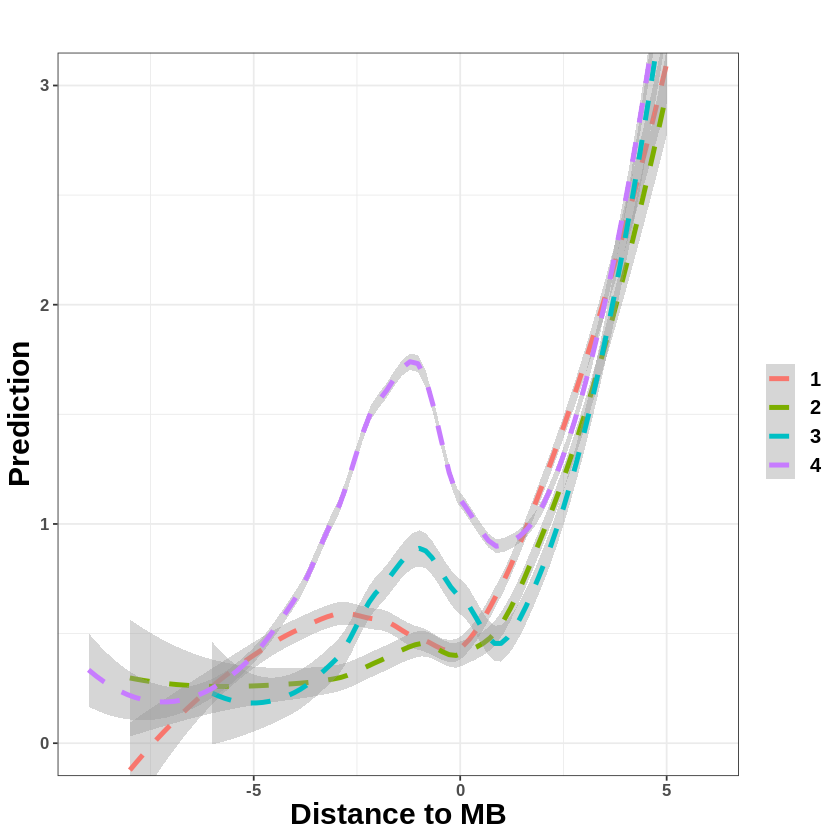

In [72]:
ggplot(no_df, aes(x=dist.to.MB, y=anticip.BMU, group=pd.range))+
     geom_smooth(method= "loess", se = TRUE, aes(color=pd.range), size=1.4, linetype="dashed")+
     coord_cartesian(ylim=c(0, 3))+
     ylab("Prediction")+ xlab("Distance to MB")+
     theme_bw()+
     ggtitle("") +
     theme(text =
               element_text (size=18, face="bold", hjust = 0.5, vjust= 0.5),
           legend.title = element_blank(),
           legend.text=element_text(size=12),
           axis.text=element_text(size=10))

Description: Scatter plot illustrating the relationship between Pointwise Entropy and Distance to Morpheme Boundary (MB) in the dataset, using a graded notion of ir(regularity) instead of a dichotomous one.

`geom_smooth()` using formula = 'y ~ x'


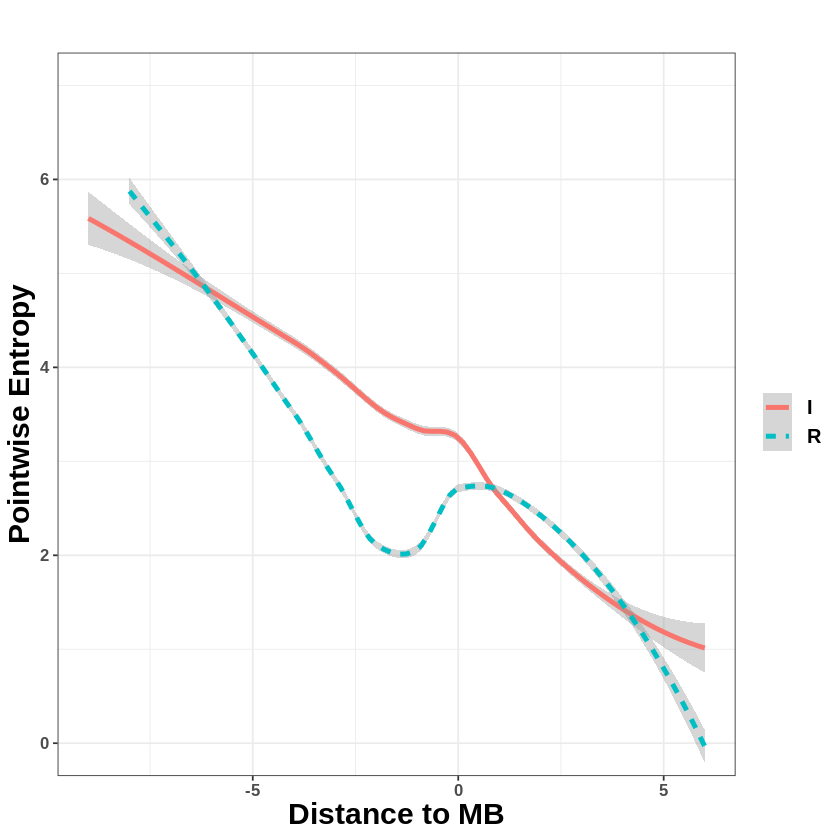

In [40]:
# ENTROPY - DIST. TO MB
ggplot(no_df, aes(x=dist.to.MB, y=pointwise.H, group=IR))+
     geom_smooth(method= "loess", se = TRUE, aes(linetype=IR, color=IR), size=1.4)+
     coord_cartesian(ylim=c(0, 7))+
     ylab("Pointwise Entropy")+ xlab("Distance to MB")+
     theme_bw()+
     ggtitle("") +
     theme(text =
           element_text (size=18, face="bold", hjust = 0.5, vjust= 0.5),
           legend.title = element_blank(),
           legend.text=element_text(size=12),
           axis.text=element_text(size=10))

Description: Scatter plot (LOESS smoothing) showing the relationship between Entropy and Distance to Morpheme Boundary (MB) in the dataset.

### Linear model for Entropy and Prediction measure

In [43]:
#ENTROPY AND PREDICTION
H_and_pred <- lm (pointwise.H ~ anticip.BMU, data=no_df)
summary(H_and_pred)


Call:
lm(formula = pointwise.H ~ anticip.BMU, data = no_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6745 -1.0235 -0.1795  0.8789  6.7985 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.674531   0.011097   331.1   <2e-16 ***
anticip.BMU -0.719455   0.006881  -104.6   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.469 on 26563 degrees of freedom
Multiple R-squared:  0.2915,	Adjusted R-squared:  0.2915 
F-statistic: 1.093e+04 on 1 and 26563 DF,  p-value: < 2.2e-16


I set up a linear model expecting that the prediction capacity of the network is inversely proportional to the punctual entropy. The Multiple R-squared value indicates that the model accounts for about 29.15% of the variability in the response variable, and the F-statistic assesses the overall significance of the model. The low p-value (< 2.2e-16) suggests that the model is highly significant.

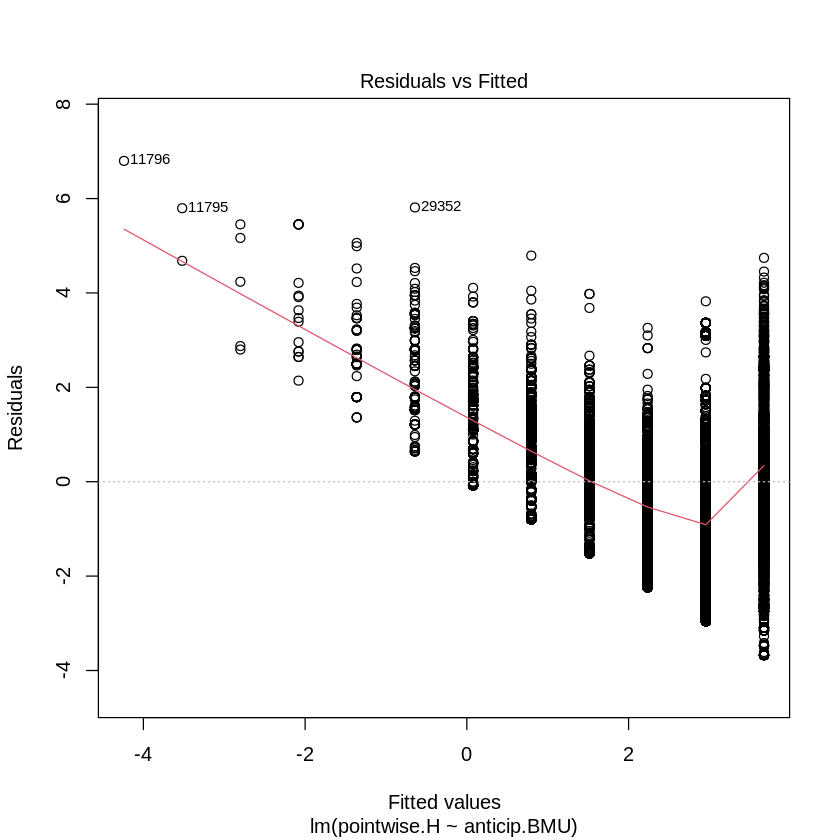

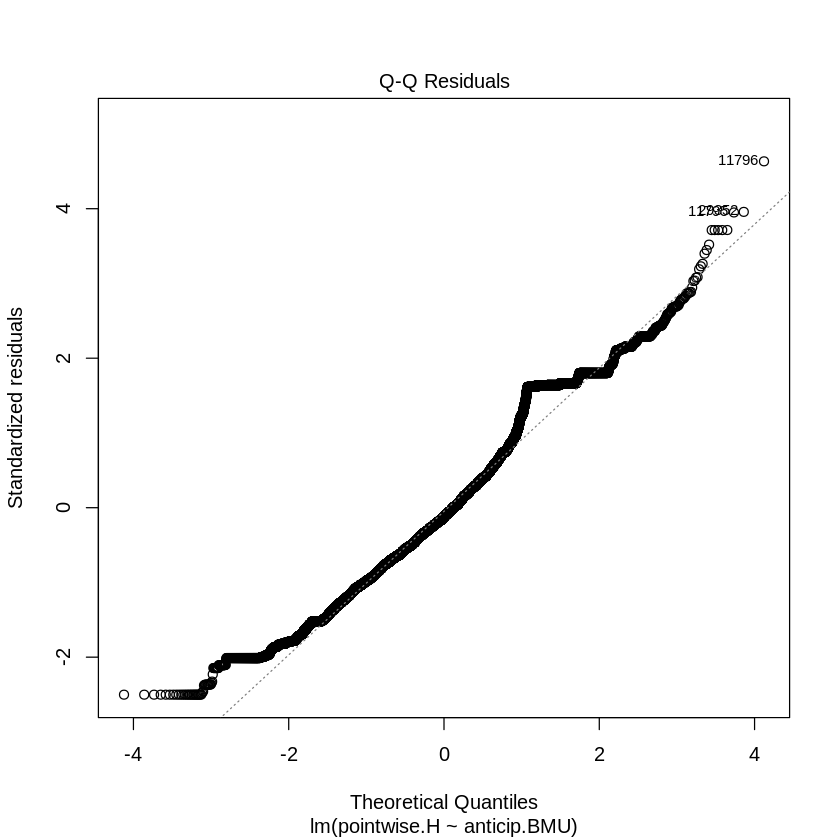

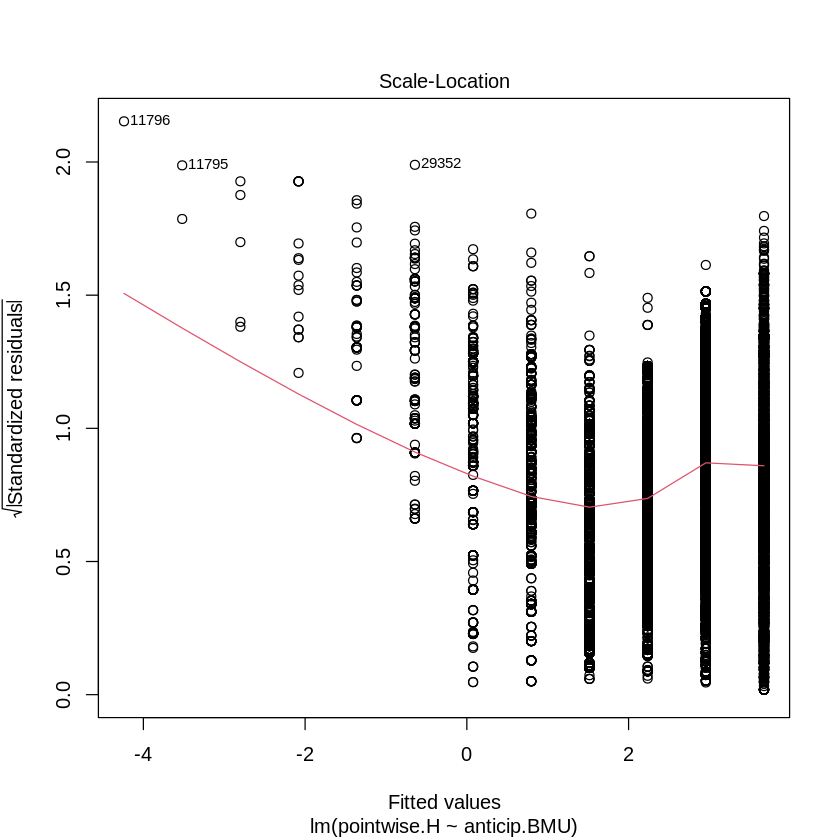

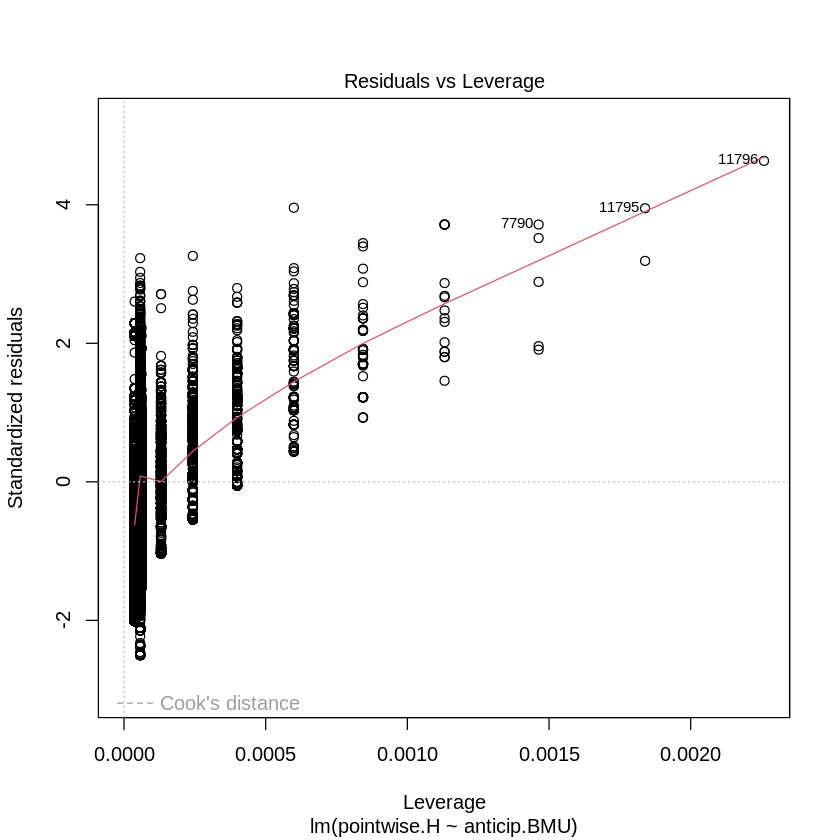

In [44]:
plot(H_and_pred)

### Probability count and plot

In [46]:
# PROBABILITY COUNT
no_df$prob <- 2^(-no_df$pointwise.H)

`geom_smooth()` using formula = 'y ~ x'


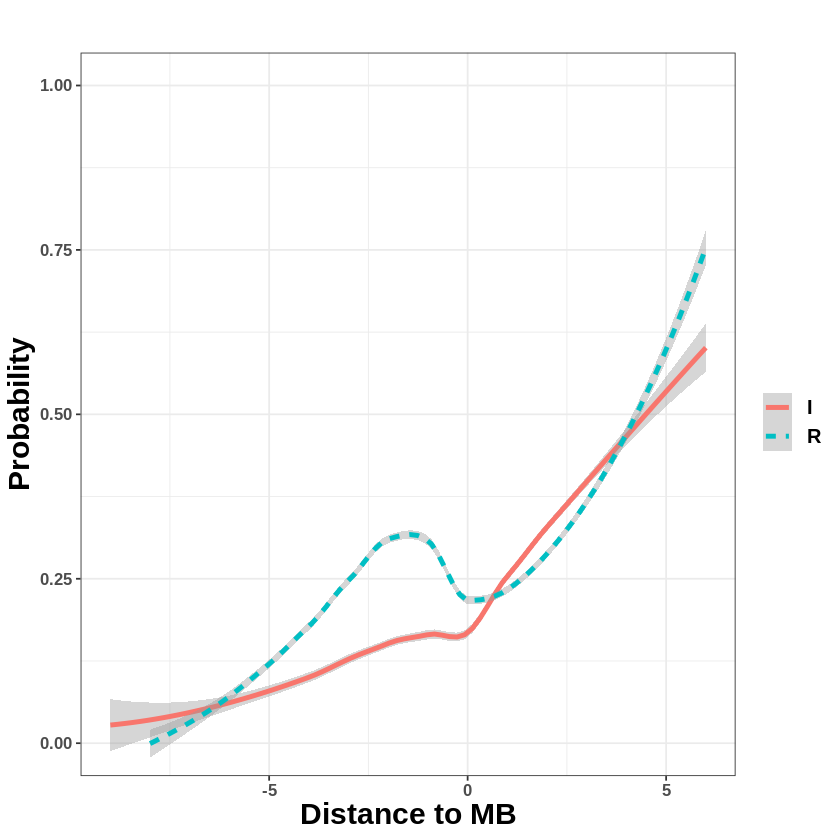

In [47]:
# PROBABILITY - DIST. TO MB
ggplot(no_df, aes(x=dist.to.MB, y=prob, group=IR))+
     geom_smooth(method= "loess", se = TRUE, aes(linetype=IR, color=IR), size=1.4)+
     coord_cartesian(ylim=c(0, 1))+
     ylab("Probability")+ xlab("Distance to MB")+
     theme_bw()+
     ggtitle("") +
     theme(text =
               element_text (size=18, face="bold", hjust = 0.5, vjust= 0.5),
           legend.title = element_blank(),
           legend.text=element_text(size=12),
           axis.text=element_text(size=10))

### Generalized Additive Model (GAM)

In [60]:
# GAM
no_df$lunghezza <-rowSums(no_df[ , c("prefix", "stem", "suffix")])
gam_model1 <- gam (anticip.BMU ~ dist.to.MB*word.NNB.stem0*lunghezza + s(dist.to.MB), data=no_df)
summary(gam_model1)


Family: gaussian 
Link function: identity 

Formula:
anticip.BMU ~ dist.to.MB * word.NNB.stem0 * lunghezza + s(dist.to.MB)

Parametric coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          1.0654622  0.1081013   9.856  < 2e-16 ***
dist.to.MB                           1.3475241  0.0953067  14.139  < 2e-16 ***
word.NNB.stem0                      -0.0175061  0.0060898  -2.875  0.00405 ** 
lunghezza                            0.0672010  0.0085594   7.851 4.28e-15 ***
dist.to.MB:word.NNB.stem0           -0.0324355  0.0024602 -13.184  < 2e-16 ***
dist.to.MB:lunghezza                -0.0562725  0.0032618 -17.252  < 2e-16 ***
word.NNB.stem0:lunghezza             0.0054350  0.0008151   6.668 2.64e-11 ***
dist.to.MB:word.NNB.stem0:lunghezza  0.0036512  0.0002924  12.486  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                edf Ref.df   

fit a Generalized Additive Model (GAM). Here the length of the word is added, (calculated as a sum of prefix, stem and suffix), extending the model to include additional predictor variables (graded regularity indicator and word-length) and their interactions with distance to morpheme. The estimated degrees of freedom (edf) are 8.122, suggesting a flexible, non-linear relationship. The p-value (<2e-16) indicates that the smooth term is highly significant, suggesting that the non-linear component added to dist.to.MB significantly improves the model fit


Summary:
	* dist.to.MB : numeric predictor; set to the value(s): -1. 
	* word.NNB.stem0 : numeric predictor; set to the value(s): 12. 
	* lunghezza : numeric predictor; with 30 values ranging from 1.000000 to 14.000000. 
	* NOTE : No random effects in the model to cancel.
 


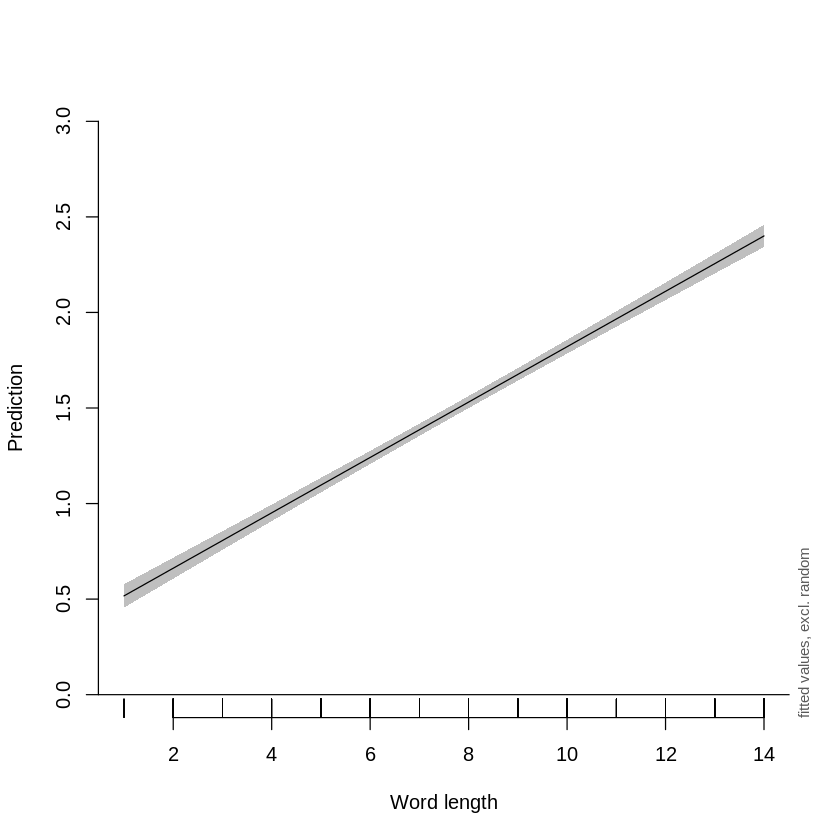

In [69]:
plot_smooth (gam_model1,
view="lunghezza",
xlab="Word length",
ylab="Prediction",
ylim=c(0, 3),
rug=TRUE,
)

Description:  Scatter plot displaying the relationship between word length and prediction in the dataset. The generalized additive model (GAM) was applied to model the association, and the resulting plot showcases the predicted values with respect to word length.

Summary:
	* dist.to.MB : numeric predictor; set to the value(s): -1. 
	* word.NNB.stem0 : numeric predictor; with 30 values ranging from 0.000000 to 13.000000. 
	* lunghezza : numeric predictor; set to the value(s): 8. 
	* NOTE : No random effects in the model to cancel.
 


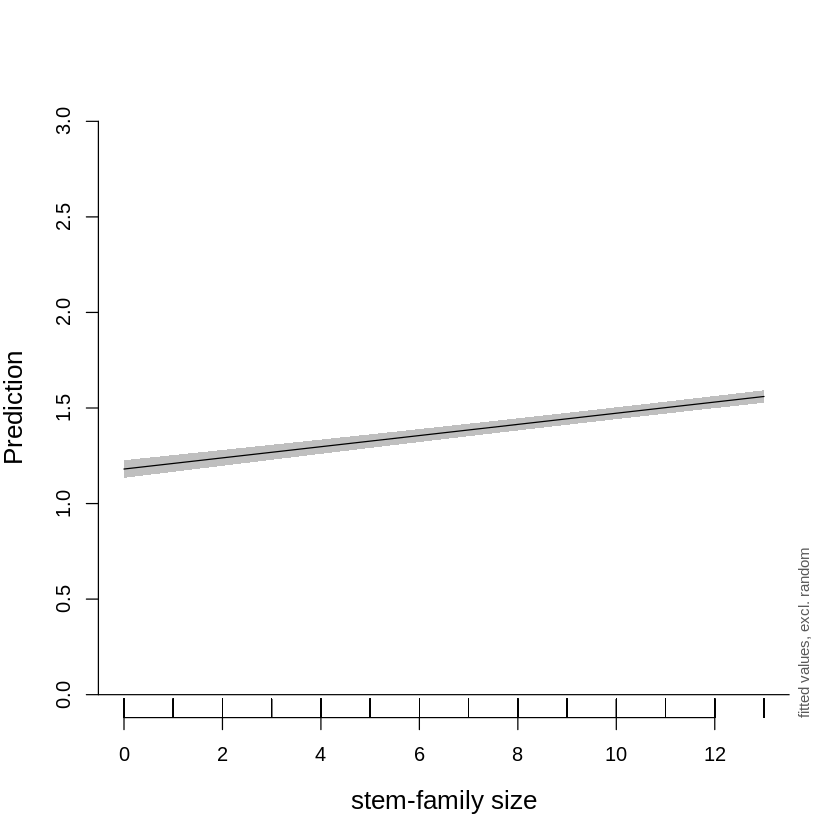

In [70]:
plot_smooth (gam_model1,
 view="word.NNB.stem0",
 xlab="stem-family size",
  ylab="Prediction",
  ylim=c(0, 3),
  rug=TRUE,
  cex.lab=1.3,
  cex.axis=1)